**Coursebook: Reshaping and Visualization**
- Part 3 of Data Analytics Specialization
- Course Length: 12 hours
- Last Updated: July 2024
___

- Author: [Samuel Chan](https://github.com/onlyphantom)
- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

## Top-Down Approach 

The coursebook is part of the **Data Analytics Specialization** offered by [Algoritma](https://algorit.ma). It takes a more accessible approach compared to Algoritma's core educational products, by getting participants to overcome the "how" barrier first, rather than a detailed breakdown of the "why". 

This translates to an overall easier learning curve, one where the reader is prompted to write short snippets of code in frequent intervals, before being offered an explanation on the underlying theoretical frameworks. Instead of mastering the syntactic design of the Python programming language, then moving into data structures, and then the `pandas` library, and then the mathematical details in an imputation algorithm, and its code implementation; we would do the opposite: Implement the imputation, then a succinct explanation of why it works and applicational considerations (what to look out for, what are assumptions it made, when _not_ to use it etc).

## Training Objectives

This coursebook is intended for participants who have completed the preceding courses offered in the **Data Analytics Developer Specialization**. This is the third course, **Reshaping and Visualization**.

The coursebook focuses on:
- Stacking and Unstacking
- Working with MultiIndex DataFrames
- Reshaping your DataFrame with Melt
- Using Group By Effectively
- Visual Data Exploratory

At the end of this course is a Learn by Building section, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

# Reproducible Environment

There are some new packages we'll use in this material. Usually, we can use `pip install`/`conda install` to install new libraries to our environment. But for now, let's try on another approach on preparing libraries needed for a certain project.

Imagine you're working with your team on a collaborative project. You initialize the project with certain dependencies and versions on your computer and all goes well. Later on, you need to 'ship' that project to your team which requires them to set up the same environment as yours. What would you do then to make sure that program will also runs smoothly on their machine? 

This is where you need to make your environment reproducible by creating a `requirements.txt` file.

If you browse on `/assets` directory on this repository, you'll find a file called `requirements.txt`. This file is used for specifying what python packages are required to run a certain project. If you open up the file, you will see something that looks similar to this:


```
-----------------
matplotlib==3.9.1
numpy==1.26.4
pandas==2.2.2
seaborn==0.13.2
yfinance==0.2.40
-----------------
```

Notice we have a line for each package, then a version number. This is important because as you start developing your python applications, you will develop the application with specific versions of the packages in mind. In simple, `requirements.txt` helps to keep track of what version of each package you are using to prevent unexpected changes.

## Importing Requirements

We have discussed what the requirement files is for but how do we use it? Since we don't want to manually install and track every package needed for a certain project, let's try to import the requirements with the following steps:

**Step 1**: Prepare your current new environment and activate it

```
conda activate <ENV_NAME>
```

**Step 2**: Navigate to the folder with your `requirements.txt`

```
cd <PATH_TO_REQUIREMENTS>
```

**Step 3**: Install the requirements

```
pip install -r requirements.txt
```

## Exporting Requirements

The `pip install` command always installs the latest published version of a package, but sometimes, you may want to install a specific version that you know works on your project.

Requirement files allow you to specify exactly which packages and versions should be installed. You can follow these steps to generate your requirement files:

**Step 1**: Activate desired environment

```
conda activate <ENV_NAME>
```

**Step 2**: Navigate to the folder where you want to save the `requirements.txt`
```
cd <PATH_TO_REQUIREMENTS_FOLDER>
```

**Step 3**: Freeze the environment

```
pip list --format=freeze > requirements.txt
```
The `freeze` command dumps all the packages and their versions to a standardized output. You can save it by any name you want but the convention is to name it as requirements.txt.

Now that you've discovered how to make your environment reproducible, we can back to our main focus of this week material; data reshaping and visualisation with pandas!

# Data Wrangling and Reshaping

In the previous two courses, we've got our hands on a few common techniques and learned how to explore data using `pandas` built-in methods. Specifically, we've  in the first and second part of this series how to use the following inspection, diagnostic and exploratory tools: 

**Data Inspection**
- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`
- Subsetting using `.loc`, `.iloc` and conditionals
---
**Diagnostic and Exploratory**
- Tables
- Cross-Tables and Aggregates
- Using `aggfunc` for aggregate functions
- Pivot Tables
- Working with DateTime
- Working with Categorical Data
- Duplicates and Missing Value Treatment

The first half of this course serves as an extension from the last. We'll pick up some new techniques to supplement our EDA toolset. Let us begin with reshaping techniques. 

In [1]:
import pandas as pd
import yfinance as data
pd.set_option('display.float_format', lambda x: '%.2f' % x) #display setting purpose only

In [2]:
symbol = ['BBRI.JK', 'ADRO.JK', 'TLKM.JK']
start_date = '2021-01-01'
end_date = '2023-12-31'
stock = data.download(symbol, start_date, end_date)
stock.columns.names = ['Attributes', 'Symbols']
stock.tail()

[*********************100%%**********************]  3 of 3 completed


Attributes Adj Close                   Close                    High          \
Symbols      ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK   
Date                                                                           
2023-12-21   2223.55 5291.50 3722.55 2600.00 5575.00 3950.00 2610.00 5600.00   
2023-12-22   2215.00 5386.41 3731.98 2590.00 5675.00 3960.00 2610.00 5700.00   
2023-12-27   2215.00 5338.96 3713.13 2590.00 5625.00 3940.00 2630.00 5725.00   
2023-12-28   2206.44 5433.87 3731.98 2580.00 5725.00 3960.00 2610.00 5750.00   
2023-12-29   2206.43 5433.87 3722.55 2380.00 5725.00 3950.00 2430.00 5750.00   

Attributes             Low                    Open                     Volume  \
Symbols    TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK    ADRO.JK   
Date                                                                            
2023-12-21 3970.00 2570.00 5525.00 3930.00 2580.00 5550.00 3960.00   34194600   
2023-12-22 3980.00 2580.00 5600.00 3950.00 2600.00 5650.00 3980.00   29264900   
2023-12-27 4000.00 2580.00 5625.00 3920.00 2600.00 5700.00 3990.00   57605200   
2023-12-28 3970.00 2560.00 5675.00 3940.00 2600.00 5700.00 3960.00   84319700   
2023-12-29 3980.00 2370.00 5675.00 3940.00 2410.00 5750.00 3960.00  124776700   

Attributes                       
Symbols       BBRI.JK   TLKM.JK  
Date                             
2023-12-21   99049600  48242100  
2023-12-22  109411300  28222700  
2023-12-27  122236700  73157200  
2023-12-28  121434600  34024400  
2023-12-29   93126000  27497600

If you do not have the `pandas_datareader` module installed, or if you're following along this coursebook without an active connection, you can instead load it from the serialized object I stored in your `data_cache` folder. 

Creating the DataFrame object by reading from `pickle`:
- `stock = pd.read_pickle('data_cache/stock')`

Serializing the DataFrame object to a byte stream using `pickle`:
- `stock.to_pickle('data_cache/stock')`

In [3]:
# write dataframe into pickle
# stock.to_pickle('data_cache/stock')

<!--
import pickle
a = 12
f= open("haha","wb")
pickle.dump(a, f)
f.close()

f=open("haha", "rb")
b = pickle.load(f)
f.close()
-->

In [4]:
stock = pd.read_pickle('data_cache/stock_2123')
stock.head()

Attributes Adj Close                   Close                    High          \
Symbols      ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK   
Date                                                                           
2021-01-04    884.01 3286.69 2898.68 1455.00 3918.11 3490.00 1460.00 3927.20   
2021-01-05    865.79 3256.18 2882.07 1425.00 3881.75 3470.00 1470.00 3909.02   
2021-01-06    835.41 3202.80 2799.01 1375.00 3818.12 3370.00 1420.00 3909.02   
2021-01-07    853.63 3263.81 2815.62 1405.00 3890.84 3390.00 1430.00 3899.93   
2021-01-08    877.94 3347.69 2965.12 1445.00 3990.84 3570.00 1485.00 3990.84   

Attributes             Low                    Open                     Volume  \
Symbols    TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK    ADRO.JK   
Date                                                                            
2021-01-04 3500.00 1360.00 3772.66 3310.00 1430.00 3772.66 3320.00  110366200   
2021-01-05 3480.00 1420.00 3854.48 3420.00 1455.00 3909.02 3480.00  107023500   
2021-01-06 3490.00 1340.00 3781.75 3330.00 1415.00 3890.84 3470.00  203948800   
2021-01-07 3450.00 1360.00 3827.21 3380.00 1370.00 3872.66 3390.00  204243100   
2021-01-08 3620.00 1430.00 3909.02 3440.00 1450.00 3936.30 3450.00  165263900   

Attributes                        
Symbols       BBRI.JK    TLKM.JK  
Date                              
2021-01-04  106226854  165339800  
2021-01-05  106964857  157800700  
2021-01-06  128299616  177877900  
2021-01-07  141798389  140221900  
2021-01-08  205011531  492643700

Notice how the data frame is a multi-index data frame. If you pay close attention, you can see a 2 levels of column axis: `Attributes` and `Symbols`. If you were to subset the data using square bracket, you will be accessing the highest level index:

In [5]:
# access attribute `High`
stock['High']

# Otherwise, this code will raise an error 
# stock['ADRO.JK']

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Date,,,
2021-01-04,1460.00,3927.20,3500.00
2021-01-05,1470.00,3909.02,3480.00
2021-01-06,1420.00,3909.02,3490.00
2021-01-07,1430.00,3899.93,3450.00
2021-01-08,1485.00,3990.84,3620.00
...,...,...,...
2023-12-21,2610.00,5600.00,3970.00
2023-12-22,2610.00,5700.00,3980.00
2023-12-27,2630.00,5725.00,4000.00


Subsetting the `Close` column from the data frame will leave us with a single index column from the `Symbols` level.

**Dive Deeper:**

Create a DataFrame by subsetting only the `Close` columns. Name it `closingprice`. Then, use `.isna().sum()` to count the number of missing values in each of the columns present in `closingprice`.

If there are any missing values, use the `.ffill()` method to fill those missing values:

<!--
closingprice = stock['Close']
closingprice.isna().sum()
-->

In [6]:
## Write your solution code here 


If you pay close attention to the index of `stock`, you may already realized by now that there are days where no records were present. 2021-01-02, 2021-01-03, 2023-12-23, and 2023-12-24 were absent from our DataFrame because they happen to fall on weekends.

While the trading hours of [different stock markets differ](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) (the NYSE for example open its market floor from 9.30am to 4pm five days a week), on weekends as well as federal holidays all stock exchanges are closed for business.

We can create (or recreate) the index by passing in our own values. In the following cell we created a date range and create the index using that new date range:

In [7]:
pd.date_range(start="2021-01-01", end="2021-03-31")

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [8]:
closingprice = stock['Close']
quarter1 = pd.date_range(start="2021-01-01", end="2021-03-31")
closingprice = closingprice.reindex(quarter1)
closingprice

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
2021-01-01,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN
2021-01-04,1455.00,3918.11,3490.00
2021-01-05,1425.00,3881.75,3470.00
...,...,...,...
2021-03-27,NaN,NaN,NaN
2021-03-28,NaN,NaN,NaN
2021-03-29,1205.00,4290.83,3410.00
2021-03-30,1175.00,4090.84,3380.00


Now use forward-fill to fill the `NA` values:

In [9]:
## Write your solution code here 

closingprice.ffill()

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
2021-01-01,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN
2021-01-04,1455.00,3918.11,3490.00
2021-01-05,1425.00,3881.75,3470.00
...,...,...,...
2021-03-27,1220.00,4290.83,3490.00
2021-03-28,1220.00,4290.83,3490.00
2021-03-29,1205.00,4290.83,3410.00
2021-03-30,1175.00,4090.84,3380.00


## `stack()` and `unstack()`

`stack()` stack the prescribed level(s) from columns to index and is particularly useful on DataFrames having a multi-level columns. It does so by "shifting" the columns to create new levels on its index. 

This is easier understood when we just see an example. Notice that `stock` has a 2-level column (Attributes and Symbols) and 1-level index (Date):

In [10]:
stock.head(10)

Attributes Adj Close                   Close                    High          \
Symbols      ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK   
Date                                                                           
2021-01-04    884.01 3286.69 2898.68 1455.00 3918.11 3490.00 1460.00 3927.20   
2021-01-05    865.79 3256.18 2882.07 1425.00 3881.75 3470.00 1470.00 3909.02   
2021-01-06    835.41 3202.80 2799.01 1375.00 3818.12 3370.00 1420.00 3909.02   
2021-01-07    853.63 3263.81 2815.62 1405.00 3890.84 3390.00 1430.00 3899.93   
2021-01-08    877.94 3347.69 2965.12 1445.00 3990.84 3570.00 1485.00 3990.84   
2021-01-11    926.54 3545.96 2990.04 1525.00 4227.20 3600.00 1540.00 4236.29   
2021-01-12    896.16 3599.34 2915.29 1475.00 4290.83 3510.00 1535.00 4336.29   
2021-01-13    920.47 3652.72 2890.37 1515.00 4354.47 3480.00 1540.00 4399.92   
2021-01-14    908.32 3637.47 2906.98 1495.00 4336.29 3500.00 1535.00 4390.83   
2021-01-15    884.01 3492.58 2890.37 1455.00 4163.56 3480.00 1495.00 4336.29   

Attributes             Low                    Open                     Volume  \
Symbols    TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK    ADRO.JK   
Date                                                                            
2021-01-04 3500.00 1360.00 3772.66 3310.00 1430.00 3772.66 3320.00  110366200   
2021-01-05 3480.00 1420.00 3854.48 3420.00 1455.00 3909.02 3480.00  107023500   
2021-01-06 3490.00 1340.00 3781.75 3330.00 1415.00 3890.84 3470.00  203948800   
2021-01-07 3450.00 1360.00 3827.21 3380.00 1370.00 3872.66 3390.00  204243100   
2021-01-08 3620.00 1430.00 3909.02 3440.00 1450.00 3936.30 3450.00  165263900   
2021-01-11 3640.00 1470.00 4009.02 3570.00 1490.00 4018.11 3590.00  278542900   
2021-01-12 3620.00 1470.00 4245.38 3500.00 1530.00 4254.47 3600.00  183107400   
2021-01-13 3550.00 1490.00 4318.11 3460.00 1530.00 4336.29 3550.00  204773900   
2021-01-14 3590.00 1490.00 4290.83 3470.00 1525.00 4381.74 3480.00  105347800   
2021-01-15 3540.00 1450.00 4136.29 3450.00 1495.00 4336.29 3510.00   86423600   

Attributes                        
Symbols       BBRI.JK    TLKM.JK  
Date                              
2021-01-04  106226854  165339800  
2021-01-05  106964857  157800700  
2021-01-06  128299616  177877900  
2021-01-07  141798389  140221900  
2021-01-08  205011531  492643700  
2021-01-11  422093240  271231200  
2021-01-12  260390447  189779500  
2021-01-13  231181533  162329300  
2021-01-14  146980798  187448400  
2021-01-15  225189839  133304300

When we stack the `stock` DataFrame, we shrink the number of levels on its column by one: `stock` now has 1-level column named `Attributes`: 

In [11]:
stock.stack()

/var/folders/kf/9qsxp79s4d1b9wvbxn93xk640000gn/T/ipykernel_63025/3693455001.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock.stack()


Attributes          Adj Close   Close    High     Low    Open     Volume
Date       Symbols                                                      
2021-01-04 ADRO.JK     884.01 1455.00 1460.00 1360.00 1430.00  110366200
           BBRI.JK    3286.69 3918.11 3927.20 3772.66 3772.66  106226854
           TLKM.JK    2898.68 3490.00 3500.00 3310.00 3320.00  165339800
2021-01-05 ADRO.JK     865.79 1425.00 1470.00 1420.00 1455.00  107023500
           BBRI.JK    3256.18 3881.75 3909.02 3854.48 3909.02  106964857
...                       ...     ...     ...     ...     ...        ...
2023-12-28 BBRI.JK    5433.87 5725.00 5750.00 5675.00 5700.00  121434600
           TLKM.JK    3731.98 3960.00 3970.00 3940.00 3960.00   34024400
2023-12-29 ADRO.JK    2206.43 2380.00 2430.00 2370.00 2410.00  124776700
           BBRI.JK    5433.87 5725.00 5750.00 5675.00 5750.00   93126000
           TLKM.JK    3722.55 3950.00 3980.00 3940.00 3960.00   27497600

[2196 rows x 6 columns]

`unstack()` does the opposite: it "shifts" the levels from index axis onto column axis. **Try and create a stack DataFrame, and then apply `unstack` on the new DataFrame to see it return to the original shape:**

In [12]:
## Write your code to try out .unstack() method here


**Dive Deeper**

Answer these following questions to ensure that you can continue for the next session:
1. How to swap the position (level) of Symbols and Attributes ? 
2. Based on your knowledge, what company (symbol) worth invest on ? (You may look on its fluctuations, means, etc)

<!--
# answer 1
stock.stack(level=0).unstack(level=1)

# answer 2
# Overal Growth Values
stock['Close'].iloc[-1,:] - stock['Close'].iloc[0,:]

# Oveal Growth Percentage
(stock['Close'].iloc[-1,:] - stock['Close'].iloc[0,:]) / stock['Close'].iloc[0,:]

# Standard Deviation 
stock['Close'].std() / stock['Close'].mean()

-->

In [13]:
# Write your solution code here 


**Knowledge Check:** Stack and Unstack

Which of the following statement is correct?

- [ ] `stack()` changes the DataFrame from wide to long
- [ ] `unstack()` changes the DataFrame from long to wide
- [ ] `unstack()` changes the DataFrame from wide to long

___

## Melt

Speaking of reshaping a DataFrame from wide format to long, another method that should be in your toolset is `melt()`. Consider the following DataFrame, which is created from `pandas` MultiIndex Slicers method, `.xs()` (Abbreviation for 'Cross Section'):

In [14]:
tlkm = stock.xs(key = 'TLKM.JK', level='Symbols', axis=1)
tlkm.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,2898.68,3490.00,3500.00,3310.00,3320.00,165339800
2021-01-05,2882.07,3470.00,3480.00,3420.00,3480.00,157800700
2021-01-06,2799.01,3370.00,3490.00,3330.00,3470.00,177877900
2021-01-07,2815.62,3390.00,3450.00,3380.00,3390.00,140221900
2021-01-08,2965.12,3570.00,3620.00,3440.00,3450.00,492643700


In [15]:
tlkm.shape

(732, 6)

The DataFrame above is wide: it has 732 rows and 6 columns. The `melt()` function gathers all the columns into one and store the value corresponding to each column such that the resulting DataFrame has 732 * 6 = 4392 rows, along with the identifier and values columns:

In [16]:
tlkm_melted = tlkm.melt()
tlkm_melted

,Attributes,value
0,Adj Close,2898.68
1,Adj Close,2882.07
2,Adj Close,2799.01
3,Adj Close,2815.62
4,Adj Close,2965.12
...,...,...
4387,Volume,48242100.00
4388,Volume,28222700.00
4389,Volume,73157200.00
4390,Volume,34024400.00


In [17]:
tlkm_melted.shape

(4392, 2)

**Knowledge Check :**
What's the difference betweent melt and stack ? 

We can optionally specify one or more columns to be identifier variables (`id_vars`), which treat all other columns as value variables (`value_vars`):

In [18]:
tlkm.reset_index().melt(id_vars=['Date'])

,Date,Attributes,value
0,2021-01-04,Adj Close,2898.68
1,2021-01-05,Adj Close,2882.07
2,2021-01-06,Adj Close,2799.01
3,2021-01-07,Adj Close,2815.62
4,2021-01-08,Adj Close,2965.12
...,...,...,...
4387,2023-12-21,Volume,48242100.00
4388,2023-12-22,Volume,28222700.00
4389,2023-12-27,Volume,73157200.00
4390,2023-12-28,Volume,34024400.00


In [19]:
tlkm.reset_index().melt(value_vars=['High', 'Low'])

,Attributes,value
0,High,3500.00
1,High,3480.00
2,High,3490.00
3,High,3450.00
4,High,3620.00
...,...,...
1459,Low,3930.00
1460,Low,3950.00
1461,Low,3920.00
1462,Low,3940.00


**Knowledge Check:** Missing Values

Given a data below, fill the missing values in `tlkm` using appropriate method:

In [20]:
march = pd.date_range(start="2021-03-01", end="2022-03-31")
tlkm = stock.xs('TLKM.JK', level='Symbols', axis=1)
tlkm = tlkm.reindex(march)
tlkm

Attributes,Adj Close,Close,High,Low,Open,Volume
2021-03-01,2898.68,3490.00,3510.00,3470.00,3490.00,91513500.00
2021-03-02,2873.76,3460.00,3500.00,3440.00,3490.00,169061400.00
2021-03-03,2857.15,3440.00,3480.00,3420.00,3480.00,82610700.00
2021-03-04,2790.71,3360.00,3430.00,3350.00,3420.00,142322100.00
2021-03-05,2757.48,3320.00,3370.00,3320.00,3340.00,128546000.00
...,...,...,...,...,...,...
2022-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-28,4013.26,4600.00,4600.00,4500.00,4510.00,184131000.00
2022-03-29,3978.36,4560.00,4620.00,4560.00,4600.00,77920800.00
2022-03-30,3995.81,4580.00,4620.00,4560.00,4620.00,118749100.00


In [21]:
## Write your code to fill the missing values in `tlkm`


# Pandas and Matplotlib

Surely this is the point where a data analyst whip up some flashy charts using the popular `matplotlib` library? 

Well - yes. Even better, we're going to use the `DataFrame.plot()` method, built-into `pandas` which in turn calls `matplotlib` plotting functions under-the-hood. Notice that we added `matplotlib.pyplot` as an import, even though our code will not explicitly call `matplotlib` but rely on `pandas` implementation.

Now let's take a look at apple stock data frame:

In [22]:
tlkm.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
2021-03-01,2898.68,3490.00,3510.00,3470.00,3490.00,91513500.00
2021-03-02,2873.76,3460.00,3500.00,3440.00,3490.00,169061400.00
2021-03-03,2857.15,3440.00,3480.00,3420.00,3480.00,82610700.00
2021-03-04,2790.71,3360.00,3430.00,3350.00,3420.00,142322100.00
2021-03-05,2757.48,3320.00,3370.00,3320.00,3340.00,128546000.00


The best way to demonstrate the efficiency gains of `DataFrame.plot()` is to see it in action. We will call `.plot()` directly on our `DataFrame` - `pandas` take care of the  matplotlib code that, [by matplotlib's own admission](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), _can be daunting to many new users_.

In [23]:
stock

Attributes Adj Close                   Close                    High          \
Symbols      ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK   
Date                                                                           
2021-01-04    884.01 3286.69 2898.68 1455.00 3918.11 3490.00 1460.00 3927.20   
2021-01-05    865.79 3256.18 2882.07 1425.00 3881.75 3470.00 1470.00 3909.02   
2021-01-06    835.41 3202.80 2799.01 1375.00 3818.12 3370.00 1420.00 3909.02   
2021-01-07    853.63 3263.81 2815.62 1405.00 3890.84 3390.00 1430.00 3899.93   
2021-01-08    877.94 3347.69 2965.12 1445.00 3990.84 3570.00 1485.00 3990.84   
...              ...     ...     ...     ...     ...     ...     ...     ...   
2023-12-21   2223.55 5291.50 3722.55 2600.00 5575.00 3950.00 2610.00 5600.00   
2023-12-22   2215.00 5386.41 3731.98 2590.00 5675.00 3960.00 2610.00 5700.00   
2023-12-27   2215.00 5338.96 3713.13 2590.00 5625.00 3940.00 2630.00 5725.00   
2023-12-28   2206.44 5433.87 3731.98 2580.00 5725.00 3960.00 2610.00 5750.00   
2023-12-29   2206.43 5433.87 3722.55 2380.00 5725.00 3950.00 2430.00 5750.00   

Attributes             Low                    Open                     Volume  \
Symbols    TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK    ADRO.JK   
Date                                                                            
2021-01-04 3500.00 1360.00 3772.66 3310.00 1430.00 3772.66 3320.00  110366200   
2021-01-05 3480.00 1420.00 3854.48 3420.00 1455.00 3909.02 3480.00  107023500   
2021-01-06 3490.00 1340.00 3781.75 3330.00 1415.00 3890.84 3470.00  203948800   
2021-01-07 3450.00 1360.00 3827.21 3380.00 1370.00 3872.66 3390.00  204243100   
2021-01-08 3620.00 1430.00 3909.02 3440.00 1450.00 3936.30 3450.00  165263900   
...            ...     ...     ...     ...     ...     ...     ...        ...   
2023-12-21 3970.00 2570.00 5525.00 3930.00 2580.00 5550.00 3960.00   34194600   
2023-12-22 3980.00 2580.00 5600.00 3950.00 2600.00 5650.00 3980.00   29264900   
2023-12-27 4000.00 2580.00 5625.00 3920.00 2600.00 5700.00 3990.00   57605200   
2023-12-28 3970.00 2560.00 5675.00 3940.00 2600.00 5700.00 3960.00   84319700   
2023-12-29 3980.00 2370.00 5675.00 3940.00 2410.00 5750.00 3960.00  124776700   

Attributes                        
Symbols       BBRI.JK    TLKM.JK  
Date                              
2021-01-04  106226854  165339800  
2021-01-05  106964857  157800700  
2021-01-06  128299616  177877900  
2021-01-07  141798389  140221900  
2021-01-08  205011531  492643700  
...               ...        ...  
2023-12-21   99049600   48242100  
2023-12-22  109411300   28222700  
2023-12-27  122236700   73157200  
2023-12-28  121434600   34024400  
2023-12-29   93126000   27497600  

[732 rows x 18 columns]

<Axes: xlabel='Date'>

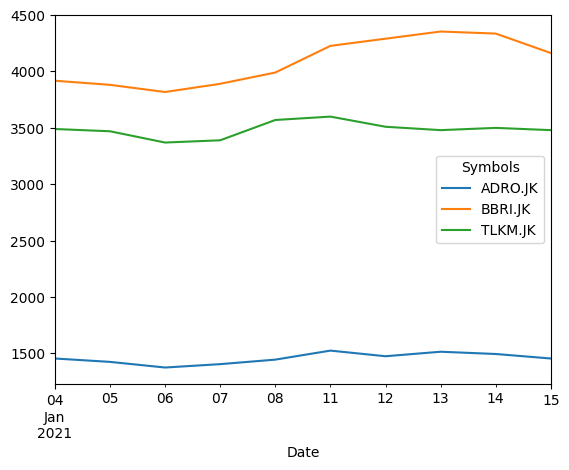

In [24]:
stock['Close'].head(10).plot()

We can [customize our plots with style sheets](https://matplotlib.org/users/style_sheets.html) but a handy reference is within reach. You can substitute 'default' for any one of the styles available and re-run the plotting code to see the styles being applied.

In [25]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('default')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Because the `.plot()` method is called on a DataFrame object, we can have an indexed DataFrame with multiple columns and `plot` will handle these using its default options:

<Axes: >

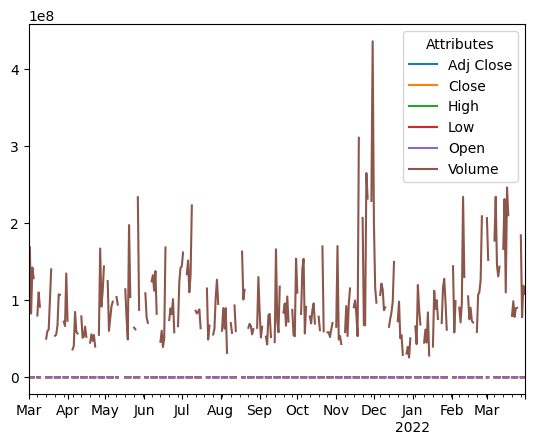

In [26]:
tlkm.plot()

<Axes: >

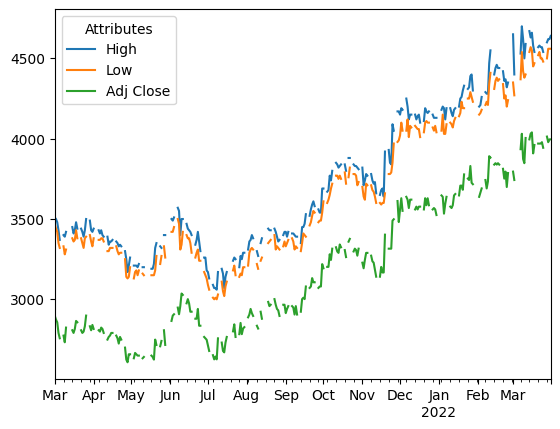

In [27]:
tlkm.loc[:, ['High', 'Low', 'Adj Close']].plot()

## Other Visualization
one column visualization:
- `.plot.bar()` or `.plot.barh()` for bar plots
- `.plot.hist()` for histogram 
- `.plot.box()` or `.boxplot()` for boxplot
- `.plot.kde()` or `.plot.density()` for density plots
- `.plot.area()` for area plots 
- `.plot.pie()` for pie plots

two column visualization:
- `.plot.scatter()` for scatter plots
- `.plot.hexbin()` for hexagonal bin plots



# Group By

Reshaping data is an important component of any data wrangling toolkit as it allows the analyst to "massage" the data into the desired shape for further processing. 

Another equally important technique is the group by operation. Analysts having some experience with SQL or other data analysis toolsets (R's `tidyverse` for example) will find the group by operation a familiar strategy in many analysis-heavy workflow.

Consider the following DataFrame:

In [28]:
stock_adj = stock.stack()
stock_adj['Volume USD'] = stock_adj['Volume'] * stock_adj['Adj Close']
stock_adj = stock_adj.unstack()

/var/folders/kf/9qsxp79s4d1b9wvbxn93xk640000gn/T/ipykernel_63025/2450437235.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock_adj = stock.stack()


In [29]:
volume = stock_adj.xs('Volume USD', level='Attributes', axis=1)
volume = volume.round(2)
volume

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Date,,,
2021-01-04,97565148878.27,349134239797.51,479267039062.99
2021-01-05,92659429524.08,348297081898.88,454792327506.10
2021-01-06,170380363608.98,410918298297.77,497882196324.98
2021-01-07,174348973400.99,462802696741.86,394811910615.01
2021-01-08,145091344945.53,686315190355.93,1460749910413.82
...,...,...,...
2023-12-21,76033354409.91,524120716579.69,179583678822.00
2023-12-22,64821646328.74,589334351222.46,105326413588.62
2023-12-27,127595307043.46,652616250198.24,271641971135.16


Notice how the data frame shows amount of daily volume transaction, say we would like to compare the average daily transaction for ADRO.JK, BBRI.JK, and TLKM.JK. Let's perform a melting function:

In [30]:
volume_melted = volume.melt()
volume_melted

,Symbols,value
0,ADRO.JK,97565148878.27
1,ADRO.JK,92659429524.08
2,ADRO.JK,170380363608.98
3,ADRO.JK,174348973400.99
4,ADRO.JK,145091344945.53
...,...,...
2191,TLKM.JK,179583678822.00
2192,TLKM.JK,105326413588.62
2193,TLKM.JK,271641971135.16
2194,TLKM.JK,126978213512.70


Supposed we would like to compare the average volume transaction between each stock price. On average, which of the 3 stocks has the highest average daily transaction volume?

<Axes: xlabel='Symbols'>

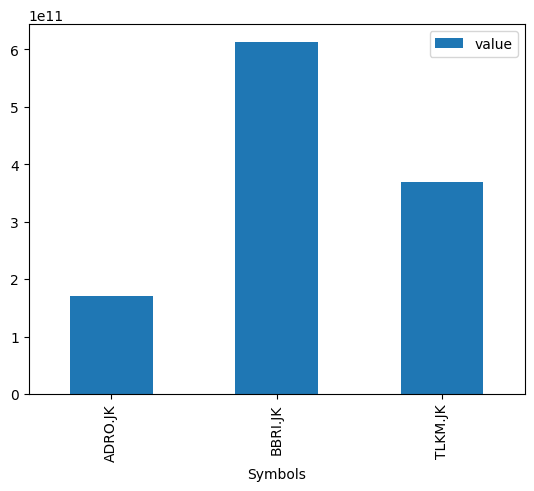

In [31]:
volume_melted.groupby(['Symbols']).mean().plot.bar()

## Visualizing Barchart for Comparison
    
Say we would like to compare the average daily volume sold from the companies. To do that, we will need to extract volume attribute from our dataframe, and perform a melt function:

<Axes: xlabel='Symbols'>

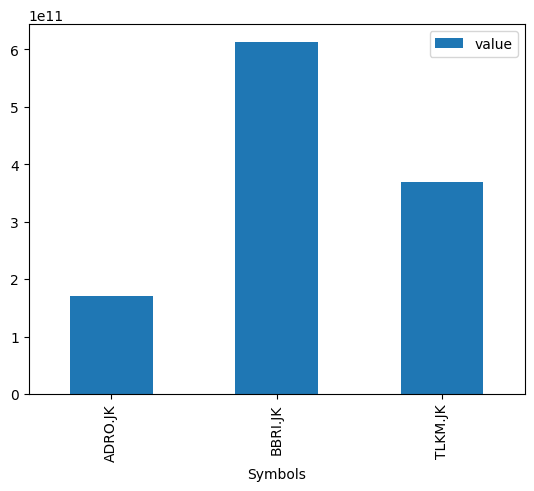

In [32]:
volume_melted.groupby('Symbols').mean().plot.bar()

If we were to compare the visualization to the numerical figure, it is far way easier to compare each stock's average volume. Now let's consider this following data frame:

In [33]:
bbri = stock.xs('BBRI.JK', level='Symbols', axis=1)
bbri = bbri.round(2)
bbri['Close_Diff'] = bbri['Close'].diff()
bbri['Weekday'] = bbri.index.day_name()
bbri['Month'] = bbri.index.month_name()
bbri

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff,Weekday,Month
Date,,,,,,,,,
2021-01-04,3286.69,3918.11,3927.20,3772.66,3772.66,106226854,NaN,Monday,January
2021-01-05,3256.18,3881.75,3909.02,3854.48,3909.02,106964857,-36.36,Tuesday,January
2021-01-06,3202.80,3818.12,3909.02,3781.75,3890.84,128299616,-63.63,Wednesday,January
2021-01-07,3263.81,3890.84,3899.93,3827.21,3872.66,141798389,72.72,Thursday,January
2021-01-08,3347.69,3990.84,3990.84,3909.02,3936.30,205011531,100.00,Friday,January
...,...,...,...,...,...,...,...,...,...
2023-12-21,5291.50,5575.00,5600.00,5525.00,5550.00,99049600,25.00,Thursday,December
2023-12-22,5386.41,5675.00,5700.00,5600.00,5650.00,109411300,100.00,Friday,December
2023-12-27,5338.96,5625.00,5725.00,5625.00,5700.00,122236700,-50.00,Wednesday,December


Pay special attention to how the Close_Diff column was created. It's the difference between the Close value of a stock price on a given day and the following day.

Supposed we want to compare the Close_Diff between each Weekday; On average, does Tuesday record a higher difference between the Close price of BRI stock compared to a Thursday?

In [34]:
bbri.groupby('Weekday').mean(numeric_only=True)

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff
Weekday,,,,,,,
Friday,4070.81,4535.12,4581.57,4490.43,4538.75,156963040.46,2.01
Monday,4042.40,4510.56,4557.29,4464.12,4516.27,142619614.68,-4.25
Thursday,4042.16,4512.83,4559.77,4466.65,4514.59,157505577.59,5.62
Tuesday,4072.89,4538.15,4588.08,4497.20,4540.98,151077471.14,3.44
Wednesday,4068.25,4535.05,4583.43,4489.45,4541.46,158412057.98,5.67


Now to create the same bar chart using `plot` function:

<Axes: xlabel='Weekday'>

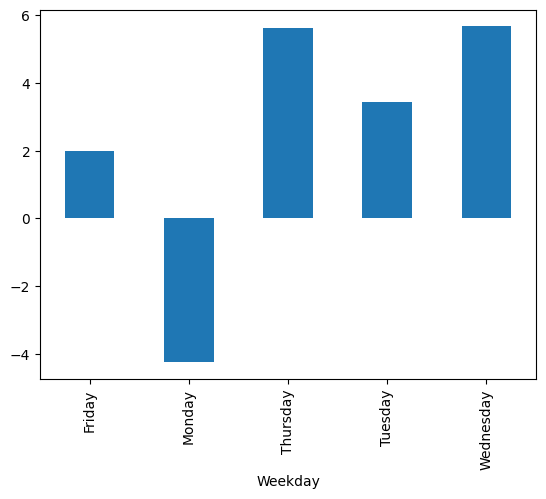

In [35]:
bbri.groupby('Weekday').mean(numeric_only=True)['Close_Diff'].plot.bar()

We can also improve our visualization efficiency by average transaction volume values in advance, so then the bars from our plot will be arranged based on the value, rather than the weekday's alphabetical order.

<Axes: xlabel='Weekday'>

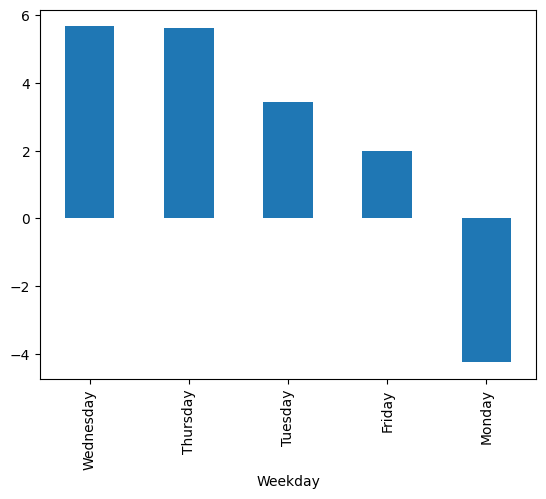

In [36]:
# bbri.groupby('Weekday').mean()['Close_Diff'].plot.bar()
bbri.groupby('Weekday').mean(numeric_only=True)['Close_Diff'].sort_values(ascending=False).plot.bar()

We can also created a manually ordered index by specifying the order of the day.

In [37]:
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

bbri_wday = bbri.groupby('Weekday').mean(numeric_only=True)['Close_Diff']

In [38]:
bbri_wday.index = pd.CategoricalIndex(bbri_wday.index,\
                                      categories=wday,\
                                      ordered=True)

<Axes: xlabel='Weekday'>

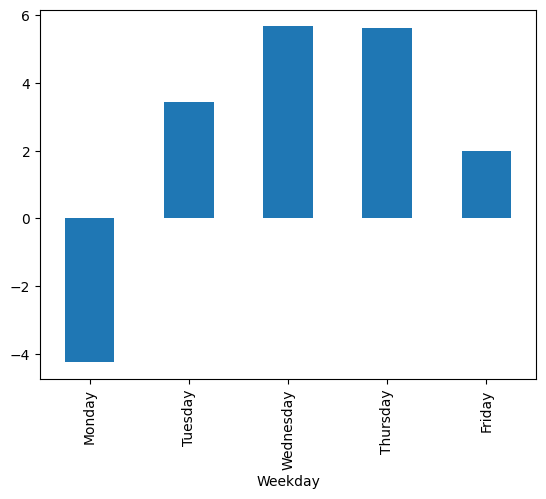

In [39]:
bbri_wday.sort_index().plot.bar()

## Using Grouped Barchart

Using `closingprice`,  we can try to visualize using a grouped barchart to compare each month's closing price for the first quarter of 2021 and compare it for the 3 stocks.

First, take a look at `closingprice` and make sure that the data has no missing values. If it has, fill it using appropriate method

In [40]:
closingprice.head()

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
2021-01-01,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN
2021-01-04,1455.00,3918.11,3490.00
2021-01-05,1425.00,3881.75,3470.00


In [41]:
## Write your solution code here 

# Fill misssing value if any
closingprice = closingprice.ffill().bfill()

# Create new column called 'Month', denoting the month name of the date
closingprice['Month'] = closingprice.index.month_name()

In [42]:
closingprice

Symbols,ADRO.JK,BBRI.JK,TLKM.JK,Month
2021-01-01,1455.00,3918.11,3490.00,January
2021-01-02,1455.00,3918.11,3490.00,January
2021-01-03,1455.00,3918.11,3490.00,January
2021-01-04,1455.00,3918.11,3490.00,January
2021-01-05,1425.00,3881.75,3470.00,January
...,...,...,...,...
2021-03-27,1220.00,4290.83,3490.00,March
2021-03-28,1220.00,4290.83,3490.00,March
2021-03-29,1205.00,4290.83,3410.00,March
2021-03-30,1175.00,4090.84,3380.00,March


After we have the `Month` columns, let's group it by Month and see the resulting DataFrame

In [43]:
average_closing = closingprice.groupby('Month').mean()
average_closing

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Month,,,
February,1198.04,4211.29,3278.57
January,1389.19,4104.62,3419.03
March,1216.45,4250.95,3406.13


<Axes: xlabel='Month'>

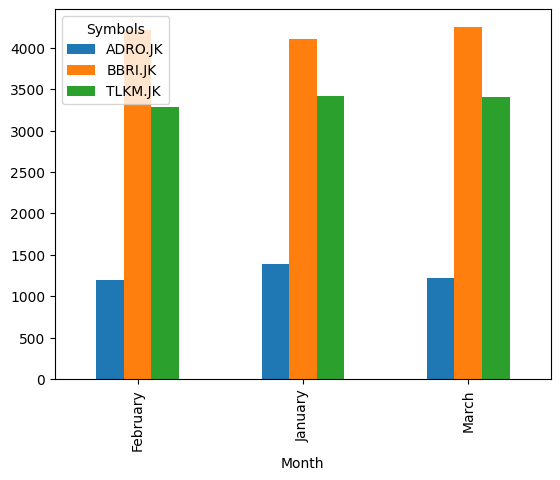

In [44]:
average_closing.sort_index().plot.bar()

However, if you want to reorder the month, we have to set the index as an ordered categorical values (See Exploratory Data Analysis materials if you need to recall). 

In [45]:
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

<Axes: xlabel='Month'>

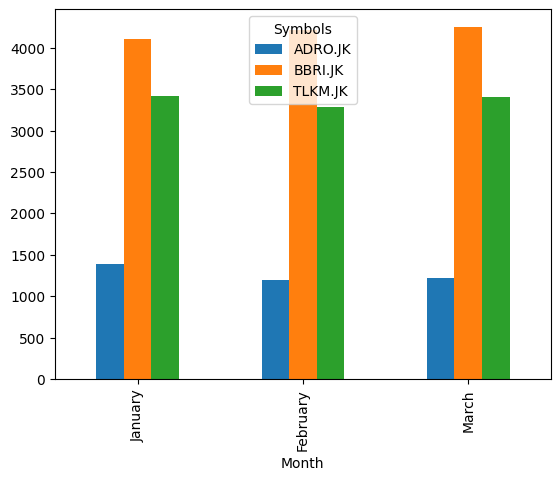

In [46]:
average_closing.index = pd.CategoricalIndex(average_closing.index,\
                                            categories=months,\
                                            ordered=True)

average_closing.sort_index().plot.bar()

A full reference to [the official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) on this method would be outside the scope of this coursebook, but is worth a read. 

## Combining `agg` and `groupby`

So far, we have explored several pandas aggregational toolkit, such as:
- `pd.crosstab()`
- `pd.pivot_table()`

In this chapter, we'll explore another pandas' aggregating tools:
- `groupby` aggregation.

**Disucission:**

(`pivot_table` & `pd.crosstab` equivalency)

The `pivot_table` method and the `crosstab` function can both produce the exact same results with the same shape. They both share the parameters; `index`, `columns`, `values`, and `aggfunc`. 

The major difference on the surface is that `crosstab` is a function and not a DataFrame method. This forces you to use columns as Series and not string names for the parameters.

1. Suppose you want to compare the number of total transactions over Weekdays of each quarter period. Create a `pivot_table` that solve the problem!


2. Try to reproduce the same result by using `crosstab`


3. What if, instead of compare the total transactions, you want to compare the total revenue from the same period? Use both `pivot_table` and `crosstab` as the solution. Discuss with your friend, which method is more relevant in this case?

Pay attention to the following group by operation:

In [47]:
stock.stack().reset_index().groupby('Symbols').mean(numeric_only=True)

/var/folders/kf/9qsxp79s4d1b9wvbxn93xk640000gn/T/ipykernel_63025/2722795617.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock.stack().reset_index().groupby('Symbols').mean(numeric_only=True)


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,,,,,,
ADRO.JK,1794.35,2440.12,2483.61,2401.94,2442.83,98892965.44
BBRI.JK,4059.31,4526.34,4574.03,4481.58,4530.41,153239150.59
TLKM.JK,3458.46,3878.74,3919.29,3837.34,3879.23,106218189.48


In [48]:
stock.stack().reset_index().groupby('Symbols').agg({
    'Close': 'mean',
    'High': 'max',
    'Low': 'min'
})

/var/folders/kf/9qsxp79s4d1b9wvbxn93xk640000gn/T/ipykernel_63025/678144441.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock.stack().reset_index().groupby('Symbols').agg({


Attributes,Close,High,Low
Symbols,,,
ADRO.JK,2440.12,4250.00,1150.00
BBRI.JK,4526.34,5750.00,3363.58
TLKM.JK,3878.74,4850.00,3000.00


Say we would like to know a glimpse of the maximum stock price, minimum stock price, and the average of closing price from the 3 companies. To do that, we'll need to combine `groupby` with `agg` and map each column with its designated of the aggregation function.

/var/folders/kf/9qsxp79s4d1b9wvbxn93xk640000gn/T/ipykernel_63025/97476832.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock.stack().reset_index().groupby('Symbols').agg({


<Axes: xlabel='Symbols'>

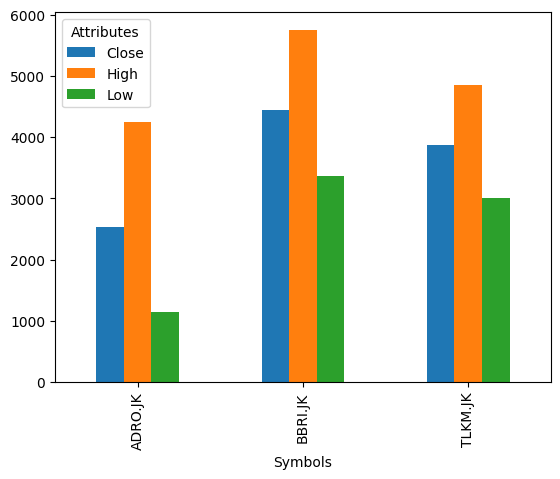

In [49]:
stock.stack().reset_index().groupby('Symbols').agg({
    'Close': 'median',
    'High': 'max',
    'Low': 'min'
}).plot.bar()

**Knowledge Check:** Using `plot`

Consider the following data frame:

In [50]:
import datetime

stock['YearMonth'] = pd.to_datetime(stock.index.date).to_period('M')
monthly_closing = stock.groupby('YearMonth').mean().loc[:,['Close','Low', 'High']]
monthly_closing.head()

Attributes   Close                     Low                    High          \
Symbols    ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK TLKM.JK ADRO.JK BBRI.JK   
YearMonth                                                                    
2021-01    1390.00 4149.93 3421.00 1364.25 4079.02 3375.00 1432.50 4232.20   
2021-02    1197.89 4197.54 3276.32 1183.16 4131.99 3231.05 1224.47 4263.08   
2021-03    1214.55 4249.93 3399.55 1200.45 4207.37 3371.82 1237.95 4307.78   
2021-04    1199.76 3856.21 3310.48 1186.19 3815.52 3292.86 1213.81 3912.05   
2021-05    1187.94 3645.93 3239.41 1180.59 3613.84 3200.00 1206.76 3705.28   

Attributes          
Symbols    TLKM.JK  
YearMonth           
2021-01    3486.50  
2021-02    3330.53  
2021-03    3441.36  
2021-04    3343.81  
2021-05    3272.35

Which of the following will be appropriate plot to use?

- [ ] Line plot -> .plot()
- [ ] Scatter plot -> .plot.scatter(x=? , y=?)
- [ ] Bar plot -> .plot.bar()
- [ ] Box plot -> .plot.box()

In [51]:
## Your code below
